In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import mixed_precision
physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass
mixed_precision.set_global_policy('mixed_float16')
tf.__version__

2023-12-23 23:52:32.185289: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-23 23:52:32.247961: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-23 23:52:32.248003: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-23 23:52:32.250173: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-23 23:52:32.263466: I tensorflow/core/platform/cpu_feature_guar

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3050 Laptop GPU, compute capability 8.6


2023-12-23 23:52:34.640080: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-23 23:52:34.739781: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-23 23:52:34.739820: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-23 23:52:34.740329: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


'2.15.0'

# Introduction to convolutional neural networks with tensorflow

Computer vision is a practice of writing algoritms which can discover patterns in visual data.

## Get the data

In [2]:
import zipfile
import os
if 'pizza_steak.zip' not in os.listdir():
    !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 
    zip_ref = zipfile.ZipFile("pizza_steak.zip")
    zip_ref.extractall()
    zip_ref.close()

### Inspect the data

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
import os

# Walk through the file and list the number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 0 directories and 250 images in 'pizza_steak/test/steak'


In [7]:
# Another way to find out how many images in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

Visualise images

In [8]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of classnames from sub_directories
print(class_names)

['pizza' 'steak']


In [9]:
# Visualise images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # Setup target directory
  target_folder = target_dir+target_class

  #Get random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  plt.show()

  print(f"Image shape {img.shape}") # Shows the shape of the image

  return img


['945791.jpg']


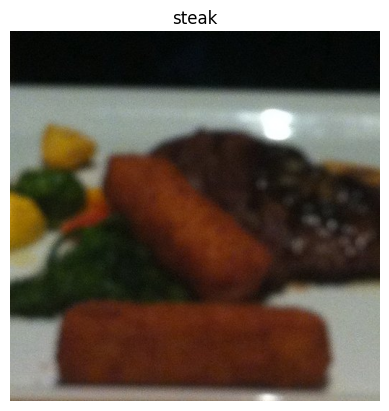

Image shape (512, 512, 3)
['1413972.jpg']


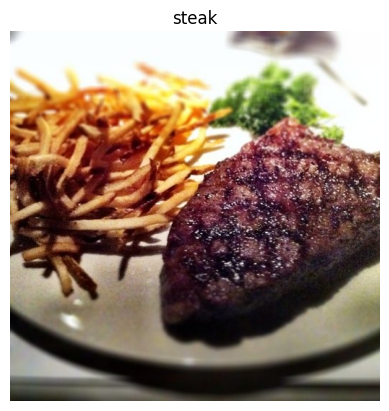

Image shape (512, 512, 3)
['2818805.jpg']


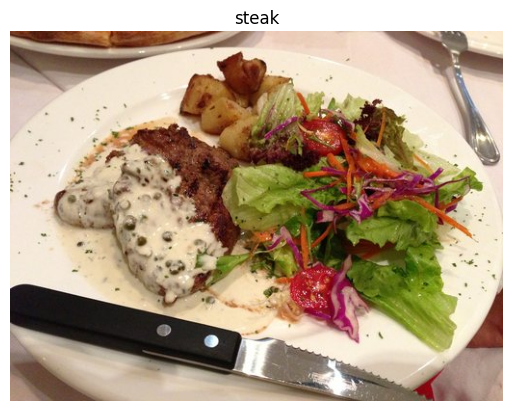

Image shape (384, 512, 3)
['227576.jpg']


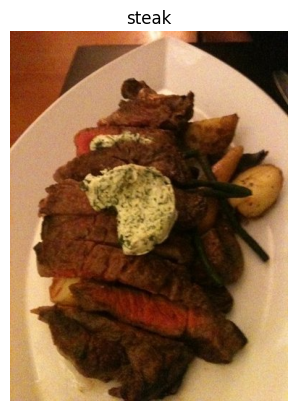

Image shape (512, 384, 3)
['1413972.jpg']


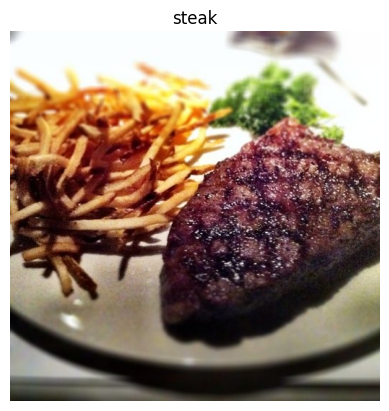

Image shape (512, 512, 3)
['3396589.jpg']


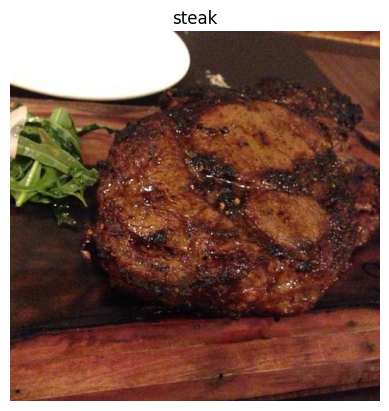

Image shape (512, 512, 3)
['2916967.jpg']


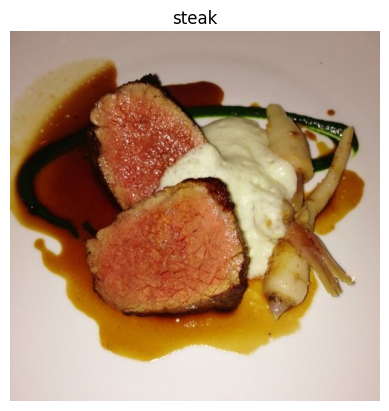

Image shape (512, 512, 3)
['465494.jpg']


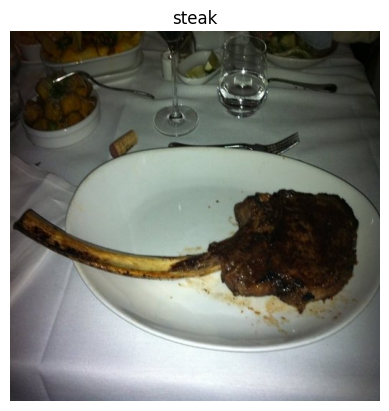

Image shape (512, 512, 3)
['2543081.jpg']


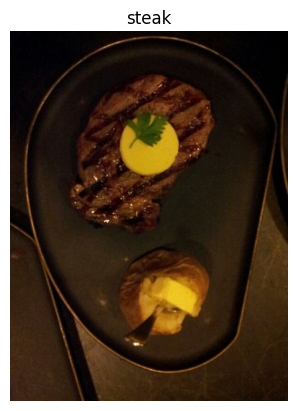

Image shape (512, 384, 3)
['3435358.jpg']


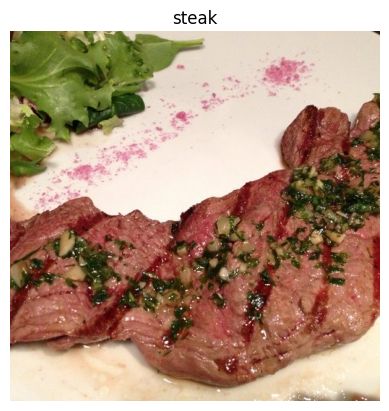

Image shape (512, 512, 3)


In [10]:
# View random image from training dataset
for i in range(10):
  img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

['1123386.jpg']


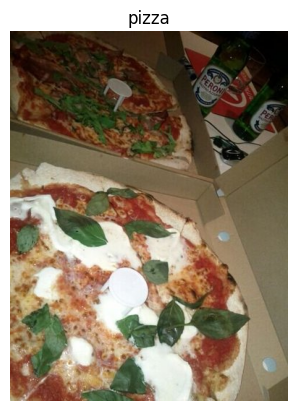

Image shape (512, 384, 3)
['2572958.jpg']


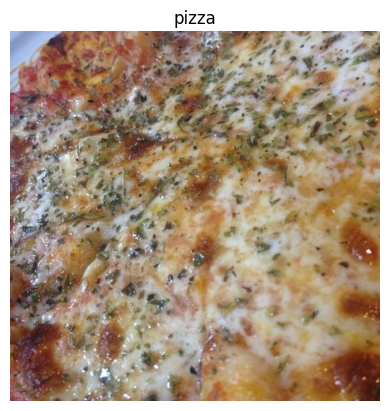

Image shape (512, 512, 3)
['1670471.jpg']


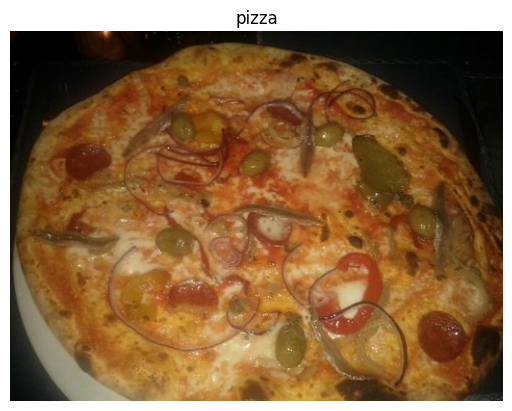

Image shape (384, 512, 3)
['1635386.jpg']


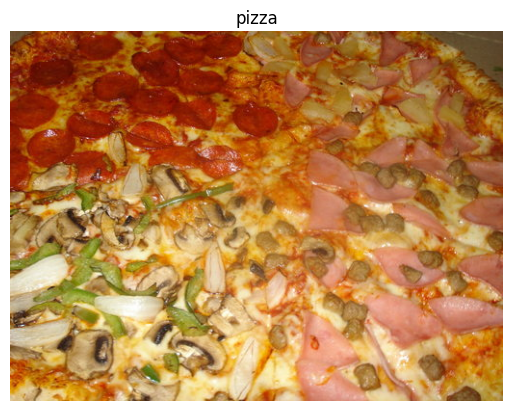

Image shape (384, 512, 3)
['2077999.jpg']


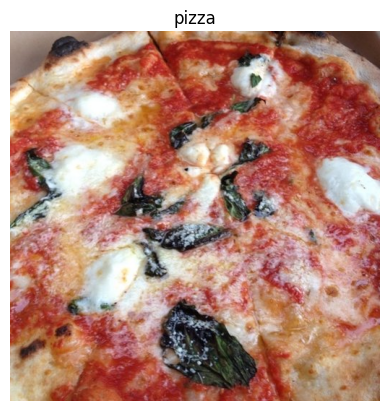

Image shape (512, 512, 3)
['3845083.jpg']


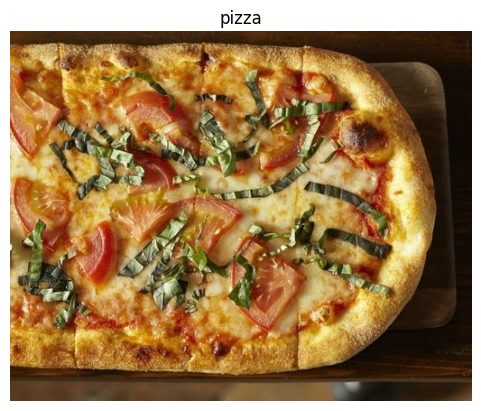

Image shape (410, 512, 3)
['2570329.jpg']


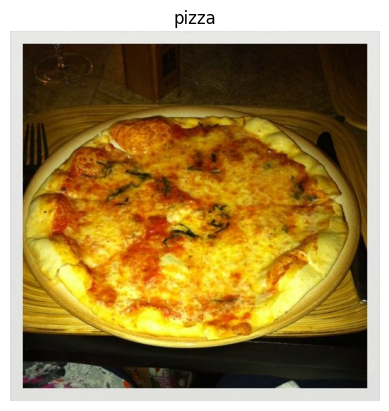

Image shape (512, 512, 3)
['1600705.jpg']


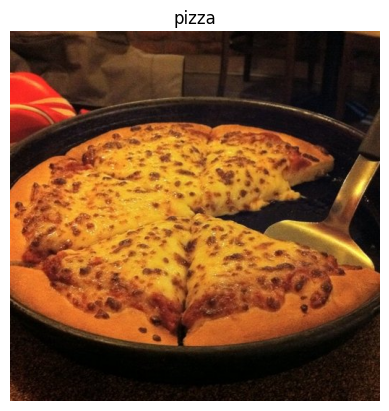

Image shape (512, 512, 3)
['3742272.jpg']


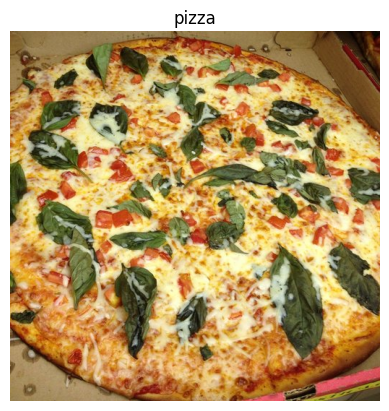

Image shape (512, 512, 3)
['910419.jpg']


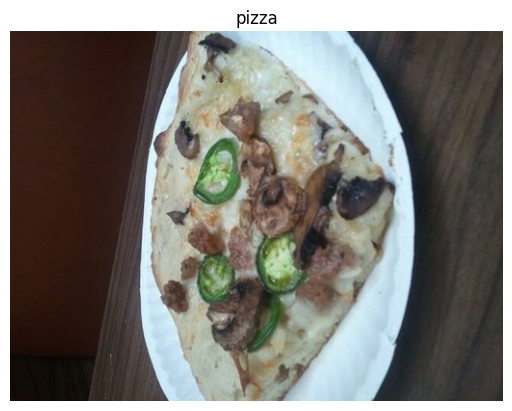

Image shape (384, 512, 3)


In [11]:
for i in range(10):
  img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [12]:
img = tf.cast(tf.constant(img),dtype=tf.float32)
img

2023-12-23 23:52:37.745862: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-23 23:52:37.745929: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-23 23:52:37.745947: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-23 23:52:37.905437: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-23 23:52:37.905487: I external/local_xla/xla/stream_executor

<tf.Tensor: shape=(384, 512, 3), dtype=float32, numpy=
array([[[55., 32., 26.],
        [55., 32., 26.],
        [54., 31., 25.],
        ...,
        [65., 59., 43.],
        [63., 57., 41.],
        [61., 55., 39.]],

       [[55., 32., 26.],
        [55., 32., 26.],
        [54., 31., 25.],
        ...,
        [63., 57., 43.],
        [62., 56., 42.],
        [61., 55., 41.]],

       [[55., 32., 26.],
        [55., 32., 26.],
        [54., 31., 25.],
        ...,
        [62., 56., 44.],
        [63., 57., 45.],
        [64., 58., 46.]],

       ...,

       [[20., 12.,  9.],
        [22., 14., 11.],
        [23., 15., 12.],
        ...,
        [45., 44., 42.],
        [46., 45., 43.],
        [45., 44., 42.]],

       [[19., 11.,  8.],
        [22., 14., 11.],
        [25., 17., 14.],
        ...,
        [45., 44., 42.],
        [45., 44., 42.],
        [44., 43., 41.]],

       [[16.,  8.,  5.],
        [20., 12.,  9.],
        [24., 16., 13.],
        ...,
        [45., 44., 

In [13]:
img.shape

TensorShape([384, 512, 3])

In [14]:
# Normalize the data
img/255.

<tf.Tensor: shape=(384, 512, 3), dtype=float32, numpy=
array([[[0.21568628, 0.1254902 , 0.10196079],
        [0.21568628, 0.1254902 , 0.10196079],
        [0.21176471, 0.12156863, 0.09803922],
        ...,
        [0.25490198, 0.23137255, 0.16862746],
        [0.24705882, 0.22352941, 0.16078432],
        [0.23921569, 0.21568628, 0.15294118]],

       [[0.21568628, 0.1254902 , 0.10196079],
        [0.21568628, 0.1254902 , 0.10196079],
        [0.21176471, 0.12156863, 0.09803922],
        ...,
        [0.24705882, 0.22352941, 0.16862746],
        [0.24313726, 0.21960784, 0.16470589],
        [0.23921569, 0.21568628, 0.16078432]],

       [[0.21568628, 0.1254902 , 0.10196079],
        [0.21568628, 0.1254902 , 0.10196079],
        [0.21176471, 0.12156863, 0.09803922],
        ...,
        [0.24313726, 0.21960784, 0.17254902],
        [0.24705882, 0.22352941, 0.1764706 ],
        [0.2509804 , 0.22745098, 0.18039216]],

       ...,

       [[0.07843138, 0.04705882, 0.03529412],
        [0.08

## An end-to-end exsmple

build a convolutional neural network

* Load image
* Pre-process images
* Build CNN
* Compile CNN
* Fit CNN

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu"),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)                                                                                                                                     
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


2023-12-23 23:52:39.455768: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-23 23:52:39.566620: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2023-12-23 23:52:39.634811: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-23 23:52:43.824067: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f5250003890 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-23 23:52:43.824130: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-12-23 23:52:43.834485: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1703355763.936745    7293 devic

47/47 [==============================] - 13s 147ms/step - loss: 0.5459 - accuracy: 0.7180 - val_loss: 0.3688 - val_accuracy: 0.8460
Epoch 2/5
47/47 [==============================] - 3s 62ms/step - loss: 0.4115 - accuracy: 0.8233 - val_loss: 0.3510 - val_accuracy: 0.8540
Epoch 3/5
47/47 [==============================] - 3s 61ms/step - loss: 0.3831 - accuracy: 0.8393 - val_loss: 0.3167 - val_accuracy: 0.8800
Epoch 4/5
47/47 [==============================] - 3s 62ms/step - loss: 0.3188 - accuracy: 0.8693 - val_loss: 0.4544 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 3s 62ms/step - loss: 0.2658 - accuracy: 0.9000 - val_loss: 0.3028 - val_accuracy: 0.8740


In [16]:
# model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

## Use the same model as before

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data, 
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 4s 64ms/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 3s 63ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 3s 62ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 3s 62ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 3s 61ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000


In [18]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
tf.random.set_seed(42)
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(100,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])
history_3 = model_3.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 4s 64ms/step - loss: 5.8654 - accuracy: 0.6127 - val_loss: 2.0868 - val_accuracy: 0.5260
Epoch 2/5
47/47 [==============================] - 3s 62ms/step - loss: 1.2408 - accuracy: 0.6907 - val_loss: 0.6241 - val_accuracy: 0.7160
Epoch 3/5
47/47 [==============================] - 3s 64ms/step - loss: 0.7085 - accuracy: 0.7300 - val_loss: 1.5986 - val_accuracy: 0.6060
Epoch 4/5
47/47 [==============================] - 3s 65ms/step - loss: 1.0488 - accuracy: 0.6773 - val_loss: 0.6414 - val_accuracy: 0.7120
Epoch 5/5
47/47 [==============================] - 3s 63ms/step - loss: 0.4798 - accuracy: 0.7960 - val_loss: 0.5802 - val_accuracy: 0.7280


In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Summary:
Regular neural network models are good for any tensors to be trained, but with computer vision, its better to use CNN as no other method of neural network can match its potential

['1337814.jpg']


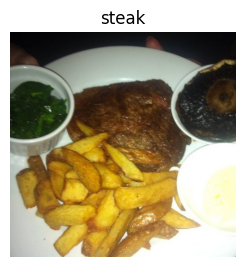

Image shape (512, 512, 3)
['2852301.jpg']


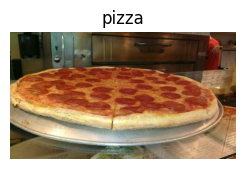

Image shape (289, 512, 3)


In [21]:
# Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_image = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_image= view_random_image("pizza_steak/train/","pizza")

### Preprocess the data

In [22]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Turn the data into batches

In [23]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_data_gen=ImageDataGenerator(rescale=1./255)

In [24]:
# Load images from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_data_gen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
# Get samples of train data batch
images, labels = train_data.next()  # get the next batch of images/lables
len(images),len(labels)

(32, 32)

In [26]:
# Get the firsy two images
images[:2],images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [27]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

(<matplotlib.image.AxesImage at 0x7f52a41110d0>, 1.0)

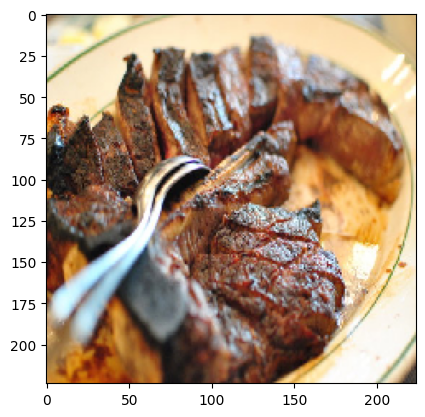

In [28]:
plt.imshow(images[0]),labels[0]

### Create a model

Start with baseline

> In deep learning there is almost infinite architectures you could create, one of best way to start is to start simple and see if it works and increase complexity if it works

In [29]:
# 3-Layers Convolutional neural network
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding="valid",
                           activation=tf.keras.activations.relu,
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

In [30]:
# Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy","mae"])

In [31]:
# Fit the model
history_4 = model_4.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 7s 100ms/step - loss: 1.7108 - accuracy: 0.6293 - mae: 0.4301 - val_loss: 0.4934 - val_accuracy: 0.7660 - val_mae: 0.3621
Epoch 2/5
47/47 [==============================] - 3s 62ms/step - loss: 0.4174 - accuracy: 0.8187 - mae: 0.2817 - val_loss: 0.4055 - val_accuracy: 0.8000 - val_mae: 0.2679
Epoch 3/5
47/47 [==============================] - 3s 67ms/step - loss: 0.3081 - accuracy: 0.8760 - mae: 0.2046 - val_loss: 0.4055 - val_accuracy: 0.8120 - val_mae: 0.2589
Epoch 4/5
47/47 [==============================] - 3s 63ms/step - loss: 0.1496 - accuracy: 0.9580 - mae: 0.1142 - val_loss: 0.3539 - val_accuracy: 0.8460 - val_mae: 0.2157
Epoch 5/5
47/47 [==============================] - 3s 62ms/step - loss: 0.0481 - accuracy: 0.9900 - mae: 0.0409 - val_loss: 0.4235 - val_accuracy: 0.8300 - val_mae: 0.2005


### Evaluate the model

<Axes: >

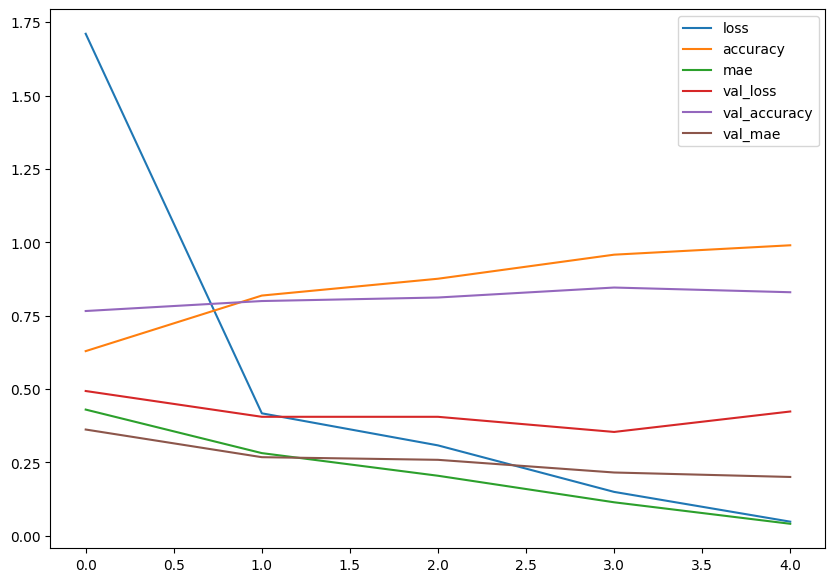

In [32]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [33]:
# Plot the curves seperately
def plot_loss_curves(history):
    
    # returns seperate loss curves
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    #plot loss:
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.plot(epochs,loss,label="training_loss")
    plt.plot(epochs,val_loss,label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    #plt.show()

    #Plot the accuracy
    plt.subplot(1,2,2)
    plt.plot(epochs,accuracy,label="training_accuracy")
    plt.plot(epochs,val_accuracy,label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    #plt.show()

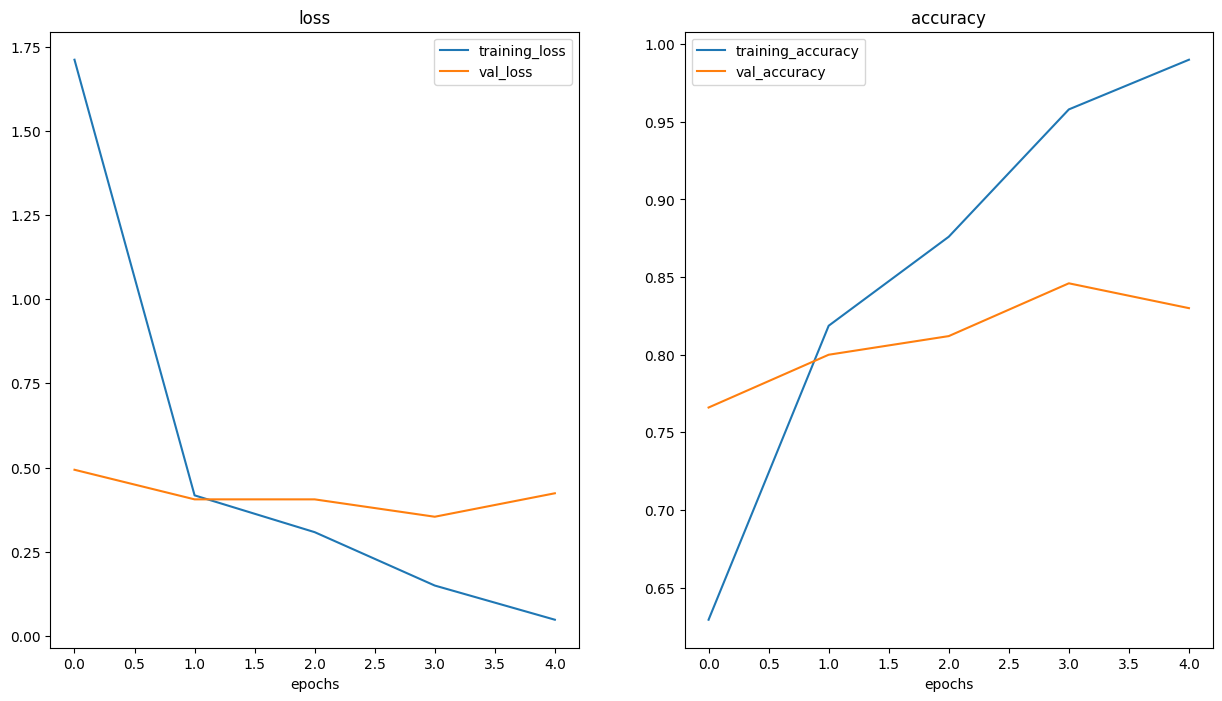

In [34]:
plot_loss_curves(history_4)

### Ways to reduce overfitting
* increase the number of Conv2D layers
* Increase the number of Conv2D filters
* Add another dense layer to the output of our flattened layer

* Add data augmentation
* Add regularization layers(such as MaxPool2D)
* Add more data

In [35]:
# Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           input_shape=(224,224,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 6s 80ms/step - loss: 0.6898 - accuracy: 0.5420 - val_loss: 0.6590 - val_accuracy: 0.6100
Epoch 2/10
47/47 [==============================] - 3s 62ms/step - loss: 0.5603 - accuracy: 0.7220 - val_loss: 0.5138 - val_accuracy: 0.7360
Epoch 3/10
47/47 [==============================] - 3s 64ms/step - loss: 0.4798 - accuracy: 0.7800 - val_loss: 0.3905 - val_accuracy: 0.8380
Epoch 4/10
47/47 [==============================] - 3s 64ms/step - loss: 0.4482 - accuracy: 0.8020 - val_loss: 0.3885 - val_accuracy: 0.8440
Epoch 5/10
47/47 [==============================] - 3s 66ms/step - loss: 0.4502 - accuracy: 0.8000 - val_loss: 0.4102 - val_accuracy: 0.8440
Epoch 6/10
47/47 [==============================] - 3s 62ms/step - loss: 0.4361 - accuracy: 0.8047 - val_loss: 0.4086 - val_accuracy: 0.8380
Epoch 7/10
47/47 [==============================] - 3s 61ms/step - loss: 0.4184 - accuracy: 0.8167 - val_loss: 0.3820 - val_accuracy: 0.8220
Epoch 8/10
47

In [36]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

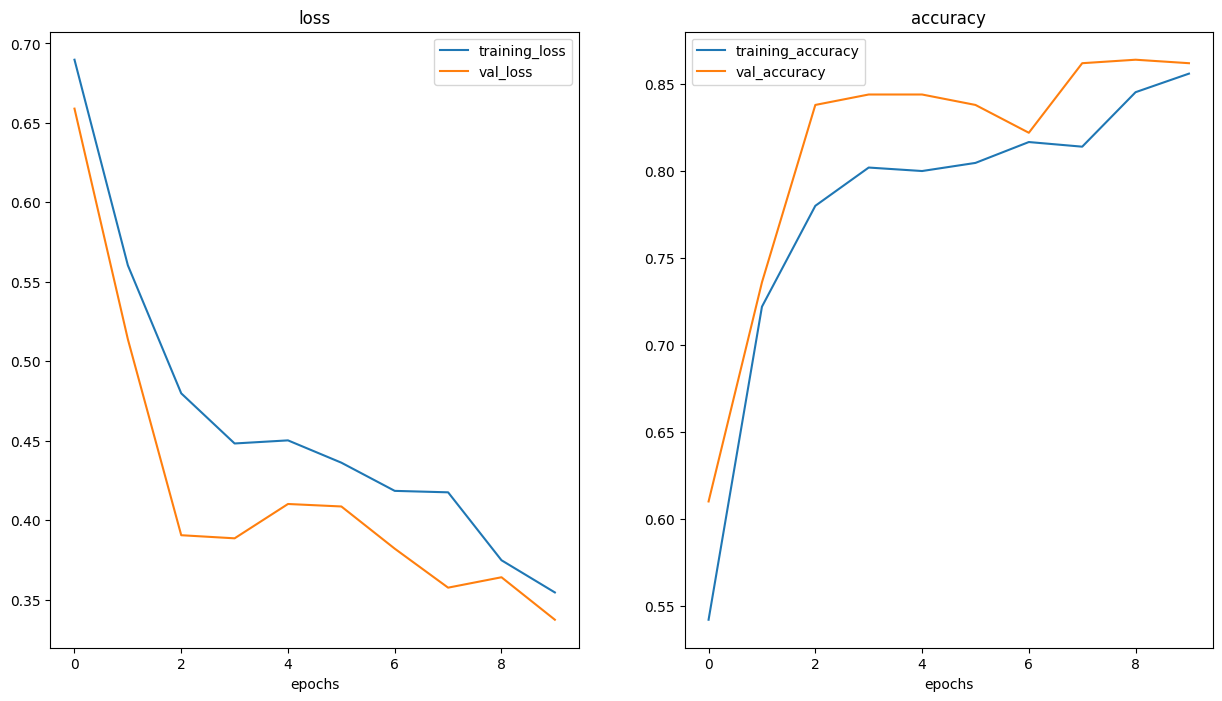

In [38]:
plot_loss_curves(history_5)

### Finding data augmentation

* Altering data leading it to have more diversity and stuff

In [39]:
# Create imageDataGenerator trainig instances with data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.6,
                                             shear_range=0.8,
                                             zoom_range=0.65,
                                             width_shift_range=0.5,
                                             height_shift_range=0.5,
                                             horizontal_flip=True)


# Create ImageDaagenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)

# Creating ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

In [40]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                         batch_size=64,
                                                         target_size=(224,224),
                                                         seed=42,
                                                         class_mode="binary",
                                                         shuffle=False)

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=64,
                                               target_size=(224,224),
                                               seed=42,
                                               class_mode="binary",
                                               shuffle=False)

test_data = test_datagen.flow_from_directory(test_dir,
                                            batch_size=64,
                                            target_size=(224,224),
                                            seed=42,
                                            class_mode="binary")

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [41]:
# Get the sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # lables arent augmented, only data

Random number :  15


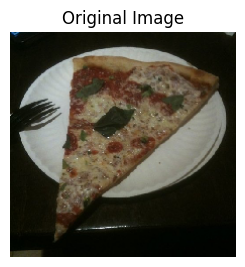

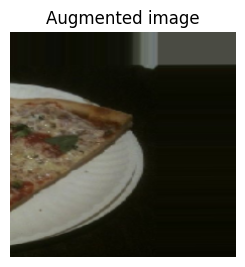

In [42]:
# Show original image and augmented image
import random
tf.random.set_seed(42)
random_number = random.randint(0,32)
"""print("Random number : ",random_number)
print("Original image\n")
plt.imshow(images[random_number])
plt.axis(False)
plt.figure()
print("Augmented image\n")
plt.imshow(augmented_images[random_number])
plt.axis(False)"""
print("Random number : ",random_number)
ax=plt.subplot(1,2,1)
plt.imshow(images[random_number])
plt.axis(False)
plt.title("Original Image")
plt.show()
ax = plt.subplot(1,2,2)
plt.imshow(augmented_images[random_number])
plt.axis(False)
plt.title("Augmented image")
plt.show()


In [43]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                         batch_size=16,
                                                         target_size=(224,224),
                                                         seed=42,
                                                         class_mode="binary",
                                                         shuffle=False)

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=16,
                                               target_size=(224,224),
                                               seed=42,
                                               class_mode="binary",
                                               shuffle=False)

test_data = test_datagen.flow_from_directory(test_dir,
                                            batch_size=16,
                                            target_size=(224,224),
                                            seed=42,
                                            class_mode="binary")
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           input_shape=(224,224,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           input_shape=(224,224,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           input_shape=(224,224,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           input_shape=(224,224,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   metrics=["accuracy"])
hisotry_6_augmented=model_6.fit(train_data_augmented,
                                epochs=10,
                                steps_per_epoch=len(train_data_augmented),
                                validation_data= test_data,
                                validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
94/94 [==============================] - 15s 134ms/step - loss: 0.7016 - accuracy: 0.4740 - val_loss: 0.6895 - val_accuracy: 0.5200
Epoch 2/10
94/94 [==============================] - 11s 119ms/step - loss: 0.6903 - accuracy: 0.5220 - val_loss: 0.6594 - val_accuracy: 0.5100
Epoch 3/10
94/94 [==============================] - 11s 119ms/step - loss: 0.6967 - accuracy: 0.5593 - val_loss: 0.6881 - val_accuracy: 0.6180
Epoch 4/10
94/94 [==============================] - 11s 117ms/step - loss: 0.6819 - accuracy: 0.5833 - val_loss: 0.6311 - val_accuracy: 0.6160
Epoch 5/10
94/94 [==============================] - 11s 117ms/step - loss: 0.6692 - accuracy: 0.6040 - val_loss: 0.6758 - val_accuracy: 0.5880
Epoch 6/10
94/94 [==============================] - 11s 116ms/step - loss: 0.6719 - accuracy: 0.6000 - val_loss: 0.6293 - val_accuracy: 0.7000
Epoch 7/10
94/94 

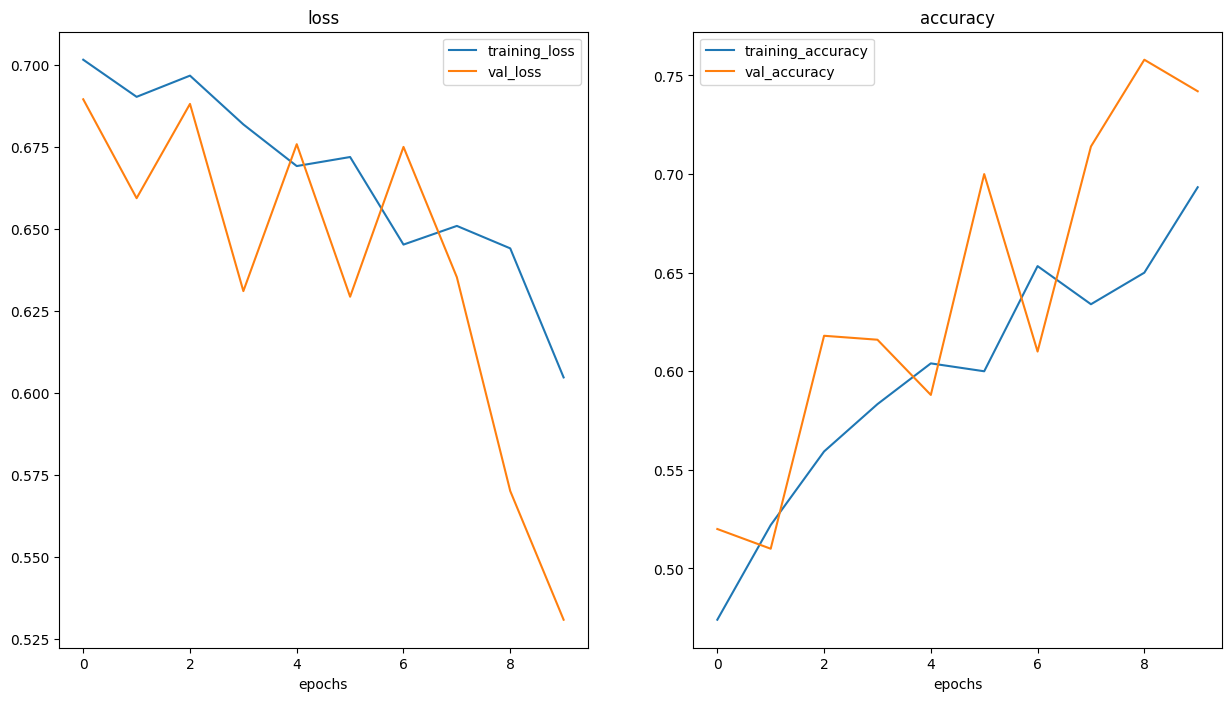

In [44]:
# Check the model's training curves
plot_loss_curves(hisotry_6_augmented)

In [45]:
# Allow shuffling of data
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   seed=42,
                                                                   class_mode="binary",
                                                                   shuffle=True)
model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation=tf.keras.activations.relu,
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation=tf.keras.activations.relu,
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation=tf.keras.activations.relu,
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_7_augmented = model_7.fit(train_data_augmented,
                                  epochs=10,
                                  steps_per_epoch=len(train_data_augmented),
                                  validation_data=test_data,
                                  validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 12s 221ms/step - loss: 0.6861 - accuracy: 0.5273 - val_loss: 0.6666 - val_accuracy: 0.5900
Epoch 2/10
47/47 [==============================] - 11s 226ms/step - loss: 0.6634 - accuracy: 0.6040 - val_loss: 0.6380 - val_accuracy: 0.6140
Epoch 3/10
47/47 [==============================] - 11s 227ms/step - loss: 0.6491 - accuracy: 0.6080 - val_loss: 0.6019 - val_accuracy: 0.6880
Epoch 4/10
47/47 [==============================] - 11s 227ms/step - loss: 0.6489 - accuracy: 0.6353 - val_loss: 0.6049 - val_accuracy: 0.7000
Epoch 5/10
47/47 [==============================] - 11s 228ms/step - loss: 0.6313 - accuracy: 0.6507 - val_loss: 0.5631 - val_accuracy: 0.7360
Epoch 6/10
47/47 [==============================] - 11s 227ms/step - loss: 0.6160 - accuracy: 0.6680 - val_loss: 0.5774 - val_accuracy: 0.7000
Epoch 7/10
47/47 [==============================] - 11s 222ms/step - loss: 0.6068 - accuracy: 0.6720

### Improve the model

* Increase the number of layers
* Increase the number of filters in each convolutional layer
* Train for longer
* Find the ideal learning rate
* Get more data
* Use transfer learning

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=16,
                                                                   seed=42,
                                                                   class_mode="binary",
                                                                   shuffle=True)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=16,
                                             seed=42,
                                             class_mode="binary",
                                             shuffle=True)
model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=20,
                           kernel_size=(2,2),
                           activation=tf.keras.activations.relu,
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=20,
                           kernel_size=(2,2),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(filters=20,
                           kernel_size=(2,2),
                           activation=tf.keras.activations.relu,
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=20,
                           kernel_size=2,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(filters=20,
                           kernel_size=2,
                           activation=tf.keras.activations.relu,
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=20,
                           kernel_size=2,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(filters=20,
                           kernel_size=(2,2),
                           activation=tf.keras.activations.relu,
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=20,
                           kernel_size=(2,2),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
history_8_augmented=model_8.fit(train_data_augmented,
                                epochs=10,
                                steps_per_epoch=len(train_data_augmented),
                                validation_data=test_data,
                                validation_steps=len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 23s 368ms/step - loss: 0.6935 - accuracy: 0.4913 - val_loss: 0.6908 - val_accuracy: 0.6200
Epoch 2/10
47/47 [==============================] - 11s 230ms/step - loss: 0.6648 - accuracy: 0.5973 - val_loss: 0.5834 - val_accuracy: 0.6880
Epoch 3/10
47/47 [==============================] - 11s 230ms/step - loss: 0.6357 - accuracy: 0.6440 - val_loss: 0.6028 - val_accuracy: 0.6740
Epoch 4/10
47/47 [==============================] - 11s 228ms/step - loss: 0.6004 - accuracy: 0.6727 - val_loss: 0.5248 - val_accuracy: 0.7340
Epoch 5/10
25/47 [==============>...............] - ETA: 4s - loss: 0.5741 - accuracy: 0.7073

In [ ]:
tf.random.set_seed(42)

train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.8,
                                             zoom_range=0.9,
                                             width_shift_range=0.65,
                                             height_shift_range=0.5,
                                             horizontal_flip=True)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   seed=42,
                                                                   class_mode="binary",
                                                                   shuffle=True)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               seed=42,
                                               class_mode="binary",
                                               shuffle=True)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             seed=42,
                                             shuffle=True)

model_9_augmented = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=2,
                           input_shape=(224,224,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=2,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=2,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=2,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=2,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=2,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=2,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=2,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

model_9_augmented.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history_9_augmented = model_9_augmented.fit(train_data_augmented,
                                  epochs=10,
                                  steps_per_epoch=len(train_data_augmented),
                                  validation_data=test_data,
                                  validation_steps=len(test_data))

model_9 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=2,
                           input_shape=(224,224,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=2,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=2,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=2,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=2,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=2,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=2,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=2,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history_9 = model_9.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [ ]:
plot_loss_curves(history_9_augmented)
plot_loss_curves(history_9)

In [ ]:
# practice the above model again
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               seed=42,
                                               batch_size=32,
                                               shuffle=True,
                                               class_mode="binary")
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               seed=42,
                                               batch_size=32,
                                               shuffle=True,
                                               class_mode="binary")

model_practice = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3,3),
                           input_shape=(224,224,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
model_practice.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics=['mae','accuracy'])
history_practive = model_practice.fit(train_data,
                                      epochs=10,
                                      steps_per_epoch=len(train_data),
                                      validation_data=test_data,
                                      validation_steps=len(test_data))


In [ ]:
plot_loss_curves(history_practive)

### Using custom data

In [ ]:
print(class_names)

In [ ]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
steak.shape,type(steak)

In [ ]:
steak_tensor = tf.cast(tf.constant(steak),dtype=tf.float32)
type(steak_tensor),steak_tensor.shape

In [ ]:
# model_practice.predict(tf.expand_dims(tf.reshape(steak_tensor,shape=(224,224)),axis=0))

### Need to resize our test image to match the shape the model has been trained upon

In [ ]:
def load_and_prep_image(filename,image_shape=224):
    #Read the image
    img = tf.io.read_file(filename)
    #Decode the read file into tensor
    img = tf.image.decode_image(img)
    #Resize image
    img = tf.image.resize(img,size=[image_shape,image_shape])
    # Rescale the image and get all values between 0 and 1
    img = img/255.
    return img

In [ ]:
steak = load_and_prep_image("03-steak.jpeg")
steak,len(steak)

In [ ]:
pred = model_practice.predict(tf.expand_dims(steak,axis=0))
pred

looks like our custom image os being put through the model

In [ ]:
class_names

In [ ]:
# We can index the predicted class by rounding the prediction probabilty
pred_class = class_names[int(tf.round(pred))]
pred_class


In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
    img=load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img,axis=0))
    pred_class = class_names[int(tf.round(pred))]
    plt.imshow(img)
    plt.title(pred_class)
    plt.axis(False)

In [ ]:
pred_and_plot(model=model_practice,filename="03-steak.jpeg")

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

In [ ]:
model_7.predict(tf.expand_dims(load_and_prep_image("03-pizza-dad.jpeg"),axis=0))

In [ ]:
pred_and_plot(model_7,"03-pizza-dad.jpeg")

Train a better model and avoid edge cases ---> 0.511 taken as steak wherein it is pizza

In [ ]:
tf.random.set_seed(42)
train_dir="pizza_steak/train/"
test_dir ="pizza_steak/test/"
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               seed=42,
                                               class_mode="binary")
test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             seed=42,
                                             class_mode="binary")
model_10 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3,3),
                           input_shape=(224,224,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(2,2),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(2,2),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(2,2),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(2,2),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(1,1),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(1,1),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.00125),
                 metrics=["accuracy"])
history_10 = model_10.fit(train_data,
                          epochs=12,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

In [ ]:
pred_and_plot(model_10,"03-pizza-dad.jpeg")

In [ ]:
pred_and_plot(model_10,"03-steak.jpeg")

# Multi-class Image Classification Problem
* (10 classes)
1. Preprocess the data
2. Create a model
3. Fit the model
4. Evaluate the model
5. Adjust different hyper-parameters
6. Repeat

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
#unzip the data
zip_ref=zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
    print("There are ",len(dirnames)," directories and ",len(filenames)," images in ",dirpath,".")

In [ ]:
# Setup the path
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Lets get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

In [ ]:
# Visualise
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [ ]:
# preprocess the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#Load data
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               seed=42,
                                               class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             seed=42,
                                             class_mode="categorical")

In [ ]:
# Create a model(start with a baseline)

model_11 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3,3),
                           activation=tf.keras.activations.relu,
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])

history_11 = model_11.fit(train_data,
                          epochs=10,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

In [ ]:
# Evaluate the model
model_11.evaluate(test_data)

In [ ]:
plot_loss_curves(history_11)

From the above loss curves, we can see that the model is overfitting, i.e., great results on training data and poor results on test dataset

### Adjust the model hyper-parameters to beat the basline(overfitting)

In [ ]:
model_12 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3,3),
                           activation=tf.keras.activations.relu,
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])

history_12 = model_12.fit(train_data,
                          epochs=10,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

In [ ]:
model_11.summary()

**Prevent overfitting:**
* Get more data
* Simplify the model - reduce the layers and reduce the complexity of the layers
* Use data augmentation
* Use transfer learning

In [ ]:
# Reduce the number of layers - 2 Conv2D layers
model_12 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           input_shape=(224,224,3),
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])
history_12 = model_12.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

In [ ]:
model_12.summary()

In [ ]:
plot_loss_curves(history_11),plot_loss_curves(history_12)

* ### Try using Data augmentation

In [ ]:
tf.random.set_seed(42)

train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             shear_range=0.2,
                                             width_shift_range=0.3,
                                             height_shift_range=0.2,
                                             vertical_flip=True,
                                             horizontal_flip=True,
                                             rotation_range=0.12)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                               target_size=(224,224),
                                                               batch_size=32,
                                                               class_mode="categorical",
                                                               shuffle=True)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical",
                                             shuffle=True)

model_13 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation=tf.keras.activations.relu,
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
model_13.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0012),
                 metrics=['accuracy'])
history_13 = model_13.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

In [ ]:
model_13.summary()

Time per epoch is taking longer beccause the data is being augmeted on the fly and the original data is not being altered at the path

In [ ]:
model_13_1 = tf.keras.models.clone_model(model_12)
model_13_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0012),
                  metrics=['accuracy'])
history_13_1 = model_13_1.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

In [ ]:
model_13.evaluate(test_data)

In [ ]:
plot_loss_curves(history_13)

### Make predictions

In [ ]:
class_names

In [ ]:
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
#!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
#!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

In [ ]:
pred = model_13.predict(tf.expand_dims(load_and_prep_image("03-pizza-dad.jpeg"),axis=0))
pred

In [ ]:
def pred_and_plot(model,filename,class_names=class_names):
    img=load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img,axis=0))

    if(len(pred[0])>1):
        pred_class=class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred[0]))]
    plt.imshow(img)
    plt.title(pred_class)
    plt.axis(False)
    plt.show()

In [ ]:
# Make a prediction
pred_and_plot(model_13,"03-pizza-dad.jpeg",class_names)
pred_and_plot(model_13,"03-hamburger.jpeg",class_names)
pred_and_plot(model_13,"03-steak.jpeg",class_names)
pred_and_plot(model_13,"03-sushi.jpeg",class_names)

#### Repeat until imporved:
1. restruct the model's architecture - increase layers nad hidden units
2. Adjust learning rate
3. hyper-parameters/data augmentation
4. training for longer
5. Transfer learning

In [ ]:
tf.random.set_seed(42)

train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             shear_range=0.2,
                                             width_shift_range=0.3,
                                             height_shift_range=0.2,
                                             vertical_flip=True,
                                             horizontal_flip=True,
                                             rotation_range=0.12)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                               target_size=(224,224),
                                                               batch_size=32,
                                                               class_mode="categorical",
                                                               shuffle=True)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="categorical",
                                             shuffle=True)

model_14 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=1,
                           activation=tf.keras.activations.relu,
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=1,
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])
model_14.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0012),
                 metrics=['accuracy'])
history_14 = model_14.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

# EXERCISE

In [ ]:
# 1. Find an ideal learning rate for a simple convolutional neural network model on the 10 class dataset.

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.25,
                                             width_shift_range=0.25,
                                             height_shift_range=0.25,
                                             horizontal_flip=True,
                                             vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   seed=42,
                                                                   batch_size=32,
                                                                   target_size=(224,224),
                                                                   class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                             seed=42,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="categorical")

from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy

model_exercise = tf.keras.models.Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           input_shape=(224,224,3),
           activation=relu),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10,
           kernel_size=3,
           input_shape=(224,224,3),
           activation=relu),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(10,activation=softmax)
])

model_exercise.compile(loss=CategoricalCrossentropy(),
                       optimizer=Adam(),
                       metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))

history_exercise = model_exercise.fit(train_data_augmented,
                                      epochs=20,
                                      steps_per_epoch=len(train_data),
                                      validation_data=test_data,
                                      validation_steps=len(test_data),
                                      callbacks=[lr_scheduler])

In [ ]:
lsr = 1e-3*(10**(tf.range(20)/20))
lsr

In [ ]:
import matplotlib.pyplot as plt
plt.semilogx(lsr,history_exercise.history["loss"])

In [ ]:
history_exercise.history

In [ ]:
ideal_lr = lsr[tf.argmax(history_exercise.history["val_loss"]).numpy()]
ideal_lr.numpy()

In [ ]:
model_exercise_2 = tf.keras.models.clone_model(model_exercise)
model_exercise_2.compile(loss=CategoricalCrossentropy(),
                         optimizer=Adam(learning_rate=ideal_lr.numpy()),
                         metrics=['accuracy'])
model_exercise_2.fit(train_data_augmented,
                     epochs=10,
                     steps_per_epoch=len(train_data),
                     validation_data=test_data,
                     validation_steps=len(test_data))

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.models import Sequential
#from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt

tf.random.set_seed(42)

train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.3,
                                             width_shift_range=0.3,
                                             height_shift_range=0.3,
                                             vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               seed=42,
                                               target_size=(224,224),
                                               batch_size=32,
                                               shuffle=True)
test_data = test_datagen.flow_from_directory(test_dir,
                                             seed=42,
                                             target_size=(224,224),
                                             batch_size=32,
                                             shuffle=True)

model_exercise_final = Sequential([
    Conv2D(filters=20,
           kernel_size=2,
           activation=relu,
           input_shape=(224,224,3)),
    Conv2D(filters=20,
           kernel_size=2,
           activation=relu),
    MaxPool2D(pool_size=2),
    Conv2D(filters=20,
           kernel_size=2,
           activation=relu),
    Conv2D(filters=20,
           kernel_size=2,
           activation=relu),
    MaxPool2D(pool_size=2),
    Conv2D(filters=20,
           kernel_size=2,
           activation=relu),
    Conv2D(filters=20,
           kernel_size=2,
           activation=relu),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(10,activation=softmax)
])

model_exercise_final.compile(loss=CategoricalCrossentropy(),
                             optimizer=Adam(),
                             metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/30))

history_exercise_final = model_exercise_final.fit(train_data_augmented,
                                                  epochs=15,
                                                  steps_per_epoch=len(train_data_augmented),
                                                  validation_data=test_data,
                                                  validation_steps=len(test_data),
                                                  callbacks=[lr_scheduler])

lrs = 1e-3*10**(tf.range(15)/30)
plt.semilogx(history_exercise_final.history["lr"],history_exercise_final.history["val_accuracy"])
plt.show()
plt.semilogx(history_exercise_final.history["lr"],history_exercise_final.history["val_loss"])
plt.show()

ideal_lr = history_exercise_final.history["lr"][tf.argmax(history_exercise_final.history["val_accuracy"])]

model_exercise_final_test = tf.keras.models.clone_model(model_exercise_final)
model_exercise_final_test.compile(loss=CategoricalCrossentropy(),
                             optimizer=Adam(learning_rate=ideal_lr),
                             metrics=['accuracy'])

history_exercise_final_test = model_exercise_final_test.fit(train_data_augmented,
                                                  epochs=15,
                                                  steps_per_epoch=len(train_data_augmented),
                                                  validation_data=test_data,
                                                  validation_steps=len(test_data))

In [ ]:
model_exercise_final_test.evaluate(test_data)

In [ ]:
model_exercise_final_test.summary()

In [ ]:
tf.keras.utils.plot_model(model_exercise_final_test,show_shapes=True)